In [1]:
# Load the Dataset.
# Link : https://www.kaggle.com/datasets/bumba5341/advertisingcsv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sales = pd.read_csv('Downloads/Advertising.csv')
sales

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [2]:
sales = sales.drop('Unnamed: 0', axis=1)
sales

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [3]:
# Preprocess the Data

sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
sales.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [5]:
sales.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
sales.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


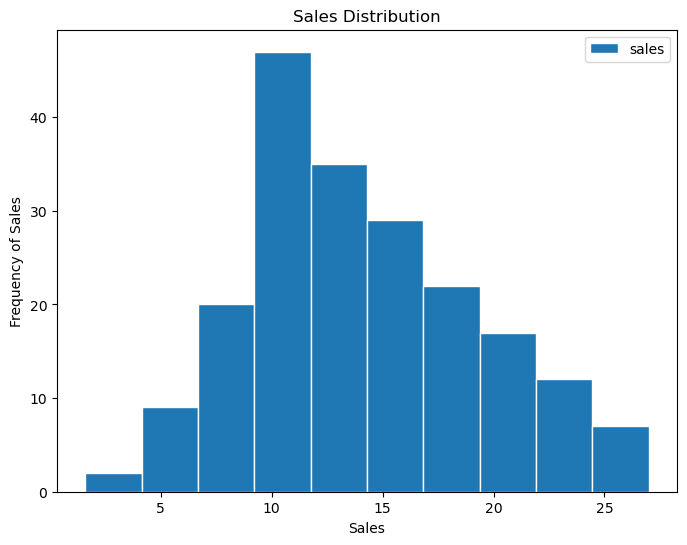

In [9]:
# Visualise the Data.

plt.figure(figsize=(8,6))
plt.hist(sales['Sales'], edgecolor='white', label='sales')
plt.xlabel('Sales')
plt.ylabel('Frequency of Sales')
plt.title('Sales Distribution')
plt.legend()
plt.show()

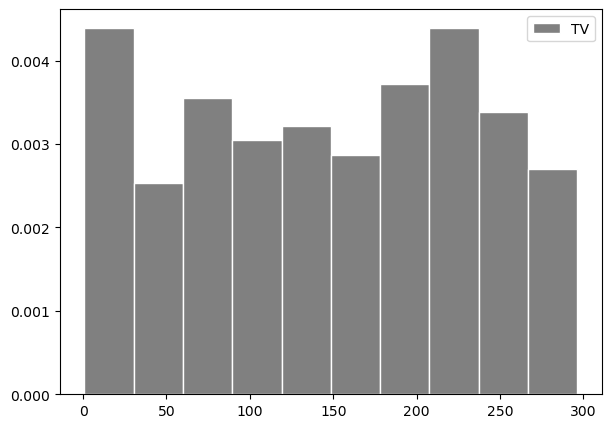

In [10]:
plt.figure(figsize=(7,5))
plt.hist(sales.TV, label='TV',edgecolor='white', color='grey', density=True)
plt.legend()
plt.show()

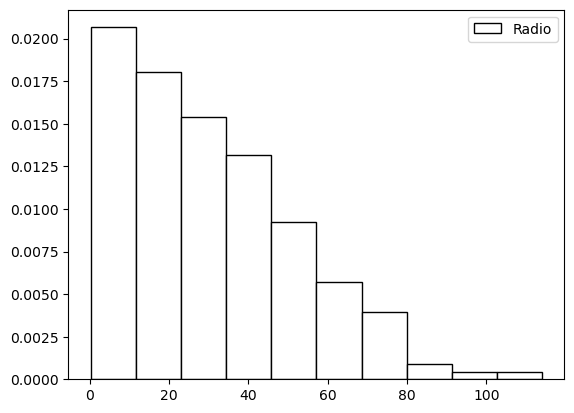

In [11]:
plt.hist(sales.Newspaper,edgecolor='k',label='Radio', color='white',density=True)
plt.legend()
plt.show()

In [12]:
sales.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


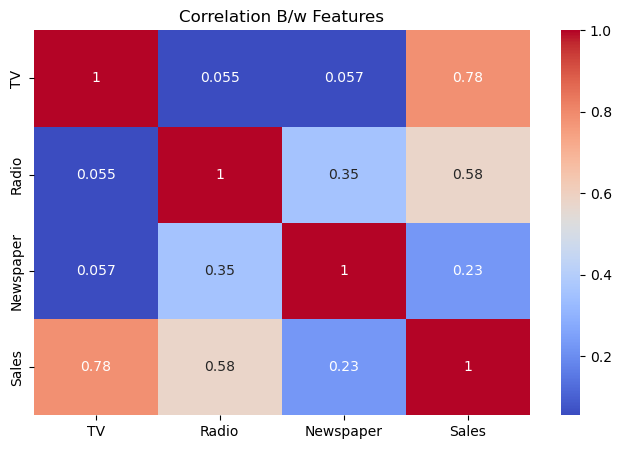

In [13]:
import seaborn as sbn

plt.figure(figsize=(8,5))
sbn.heatmap(sales.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation B/w Features')
plt.show()

In [14]:
# Split the Data into Training & Testing sets.

from sklearn.model_selection import train_test_split

sales_feature = np.array(sales.drop('Sales',axis=1))
sales_target = np.array(sales.Sales)
x_train,x_test,y_train,y_test = train_test_split(sales_feature, sales_target, test_size=0.2, random_state=28)
x_train

array([[ 19.6,  20.1,  17. ],
       [273.7,  28.9,  59.7],
       [ 27.5,   1.6,  20.7],
       [280.7,  13.9,  37. ],
       [195.4,  47.7,  52.9],
       [168.4,   7.1,  12.8],
       [ 19.4,  16. ,  22.3],
       [177. ,   9.3,   6.4],
       [239.9,  41.5,  18.5],
       [241.7,  38. ,  23.2],
       [ 17.9,  37.6,  21.6],
       [ 88.3,  25.5,  73.4],
       [243.2,  49. ,  44.3],
       [219.8,  33.5,  45.1],
       [  4.1,  11.6,   5.7],
       [ 93.9,  43.5,  50.5],
       [193.7,  35.4,  75.6],
       [109.8,  47.8,  51.4],
       [ 69.2,  20.5,  18.3],
       [ 97.5,   7.6,   7.2],
       [ 25.6,  39. ,   9.3],
       [214.7,  24. ,   4. ],
       [ 56.2,   5.7,  29.7],
       [116. ,   7.7,  23.1],
       [216.4,  41.7,  39.6],
       [204.1,  32.9,  46. ],
       [ 38. ,  40.3,  11.9],
       [ 75.5,  10.8,   6. ],
       [123.1,  34.6,  12.4],
       [220.5,  33.2,  37.9],
       [209.6,  20.6,  10.7],
       [290.7,   4.1,   8.5],
       [193.2,  18.4,  65.7],
       [ 2

In [15]:
y_train

array([ 7.6, 20.8,  6.9, 16.1, 22.4, 11.7,  6.6, 12.8, 23.2, 21.8,  8. ,
       12.9, 25.4, 19.6,  3.2, 15.3, 19.2, 16.7, 11.3,  9.7,  9.5, 17.4,
        8.7, 11. , 22.6, 19. , 10.9,  9.9, 15.2, 20.1, 15.9, 12.8, 15.2,
        8.5, 14.6, 11.7, 18. , 11.6, 15.5,  5.3,  9.4,  9.5, 10.6, 15.9,
       14.1, 19. , 25.4,  5.5, 19.7,  9.6, 10.3, 27. , 12.6, 21.7, 12.3,
       14.2, 10.6, 15.7, 14.8,  9.7, 21.4, 12.5, 15.9,  7.6, 17.4, 17. ,
       11.5, 12.2, 10.1, 13.2, 12.9, 13.4, 14.7, 16.6, 19.2, 11.3, 22.2,
       23.8, 21.5,  7. , 14.6, 20.2, 20.7, 19.4, 11.8,  9.5, 10.1, 12.9,
        8.7, 11.8,  7.3, 14.7, 23.7, 10.5, 18. , 10.5, 26.2,  7.2, 16.9,
       11.4, 17.1, 10.1, 12.4, 13.3, 20.7, 13.6,  8.8, 10.8, 22.6, 25.5,
       11.9,  7.3, 14.8,  9.3, 10.6, 12. ,  5.7, 12. ,  1.6,  8.6, 24.4,
       10.3, 13.4, 23.8, 11.8, 12.2,  6.7, 14.4, 15.5, 19.6, 17.6, 12.9,
       15. , 10.4, 19.8, 18.9, 20.7, 18.9, 11.9, 14.9,  8.1, 14.9, 15.9,
        9.7, 13.2, 14.5, 11.5, 16.6,  4.8,  9.2, 11

In [16]:
x_test

array([[139.3,  14.5,  10.2],
       [ 62.3,  12.6,  18.3],
       [ 50. ,  11.6,  18.4],
       [ 69. ,   9.3,   0.9],
       [261.3,  42.7,  54.7],
       [191.1,  28.7,  18.2],
       [215.4,  23.6,  57.6],
       [ 80.2,   0. ,   9.2],
       [129.4,   5.7,  31.3],
       [220.3,  49. ,   3.2],
       [ 16.9,  43.7,  89.4],
       [ 36.9,  38.6,  65.6],
       [210.7,  29.5,   9.3],
       [  7.8,  38.9,  50.6],
       [117.2,  14.7,   5.4],
       [135.2,  41.7,  45.9],
       [216.8,  43.9,  27.2],
       [170.2,   7.8,  35.2],
       [100.4,   9.6,   3.6],
       [289.7,  42.3,  51.2],
       [265.2,   2.9,  43. ],
       [240.1,   7.3,   8.7],
       [187.8,  21.1,   9.5],
       [218.5,   5.4,  27.4],
       [102.7,  29.6,   8.4],
       [ 48.3,  47. ,   8.5],
       [237.4,   5.1,  23.5],
       [284.3,  10.6,   6.4],
       [199.8,   3.1,  34.6],
       [ 66.9,  11.7,  36.8],
       [197.6,   3.5,   5.9],
       [149.7,  35.6,   6. ],
       [262.7,  28.8,  15.9],
       [13

In [17]:
y_test

array([13.4,  9.7,  8.4,  9.3, 24.2, 17.3, 17.1,  8.8, 11. , 24.7,  8.7,
       10.8, 18.4,  6.6, 11.9, 17.2, 22.3, 11.7, 10.7, 25.4, 12.7, 13.2,
       15.6, 12.2, 14. , 11.6, 12.5, 15. , 11.4,  9.7, 11.7, 17.3, 20.2,
       11.2,  5.3, 18. , 21.2, 22.1, 18.3, 15.5])

In [18]:
# Train the Model(Linear Regression)

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [19]:
# Make Predictions

new_data = [[139.3,  14.5,  10.2]]
LR.predict(new_data)

array([11.99347523])

In [20]:
y_pred = LR.predict(x_test)
y_pred

array([11.99347523,  8.17367051,  7.43106505,  7.81440004, 22.87821214,
       16.99357031, 17.2728866 ,  6.62805886,  9.98136835, 22.02633751,
       12.08151205, 11.97326028, 18.00355681, 10.66291398, 11.01326277,
       16.94591514, 20.99758955, 12.23247838,  9.30257231, 24.08196314,
       15.65986382, 15.23034811, 15.41200785, 13.95607293, 13.11984288,
       13.86979899, 14.74612576, 17.83871496, 12.70436412,  8.27227539,
       12.59111095, 16.35420016, 20.25321976,  9.98871808,  8.76430903,
       17.20640559, 19.96734202, 20.60089   , 17.77027268, 14.46831685])

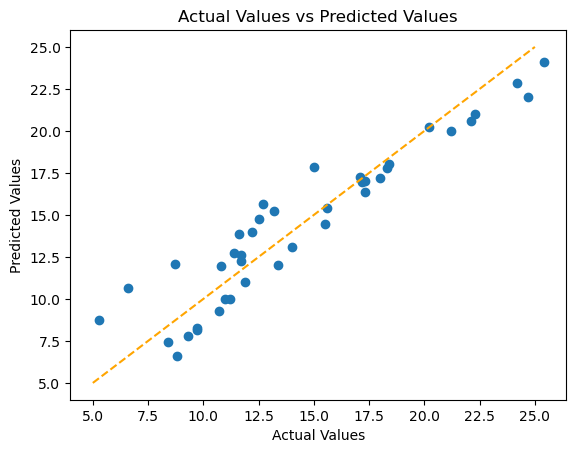

In [21]:
plt.scatter(y_test,y_pred)
plt.plot(np.linspace(5,25,100),np.linspace(5,25,100),color='orange',linestyle='dashed')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Values vs Predicted Values')
plt.show()